<a href="https://colab.research.google.com/github/sungjuGit/STPython_IntroBayes/blob/main/GlobeTossing_pymc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist
import pymc as pm
import arviz as az

In [ ]:
size = 50

θ_grid = np.zeros(size)
prior = np.zeros(size)
likelihood = np.zeros(size)
posterior_unstandardized = np.zeros(size)
posterior = np.zeros(size)

Text(0.5, 1.0, '50 points')

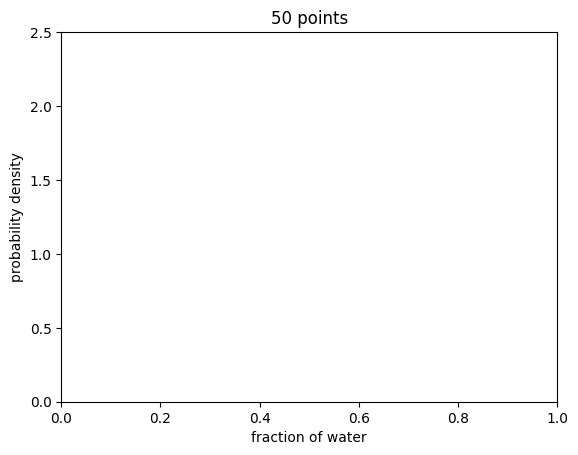

In [ ]:
fig, ax = plt.subplots()

plt.ylim(0, 2.5)
plt.xlabel("fraction of water")
plt.ylabel("probability density")
plt.title(f"{size} points")



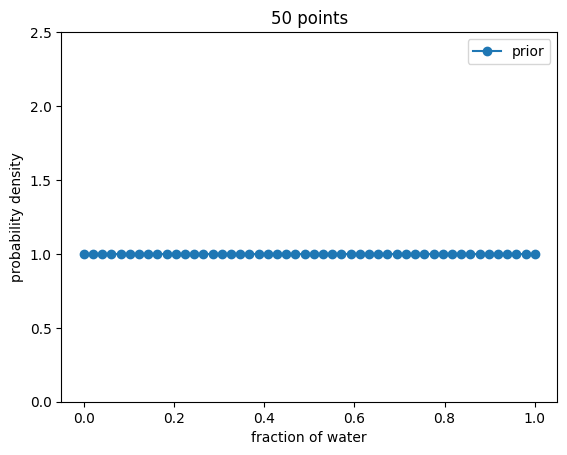

In [ ]:
# uniform prior (alpha = 1, beta = 1)
for i in range(size):
    θ_grid[i] = i * 1/(size-1)
    prior[i] = beta_dist.pdf(θ_grid[i], 1, 1)

ax.plot(θ_grid, prior, 'o-', label="prior")
ax.legend()
display(fig)

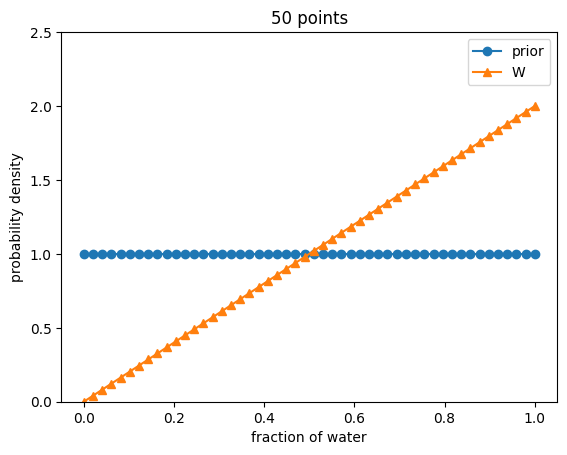

In [ ]:
# first tossing: W
for i in range(size):
    θ = θ_grid[i]
    likelihood[i] = θ  # likelihood is for W (probability to get W)
    posterior_unstandardized[i] = likelihood[i] * prior[i]

posterior = posterior_unstandardized / (np.sum(posterior_unstandardized) * 1.0/size)

ax.plot(θ_grid, posterior, '^-', label="W")
ax.legend()
display(fig)

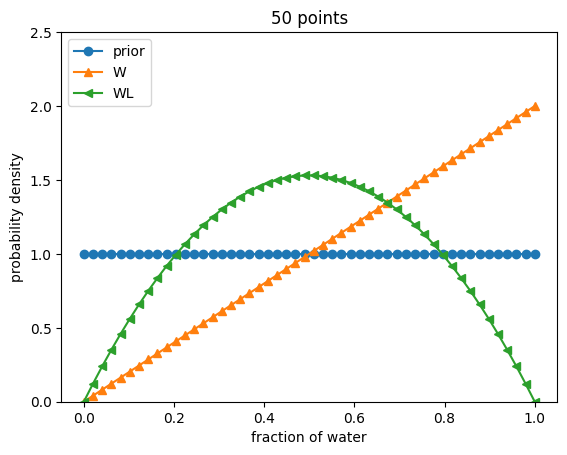

In [ ]:
# second tossing: L
prior = posterior.copy()  # the posterior from the previous step is now the prior

for i in range(size):
    θ = θ_grid[i]
    likelihood[i] = 1-θ  # likelihood is for L (probability to get L)
    posterior_unstandardized[i] = likelihood[i] * prior[i]

posterior = posterior_unstandardized / (np.sum(posterior_unstandardized) * 1.0/size)

ax.plot(θ_grid, posterior, '<-', label="WL")
ax.legend()
display(fig)

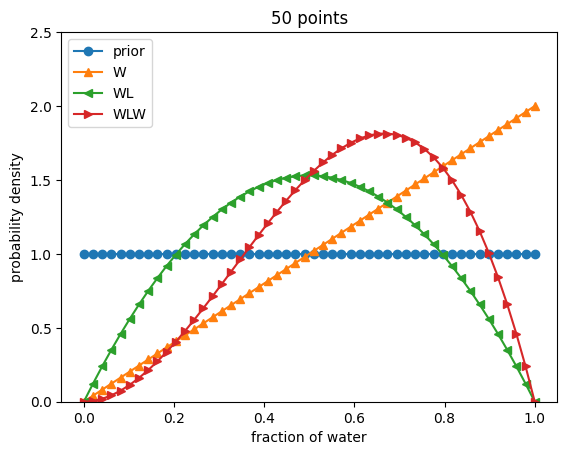

In [ ]:
# third tossing: W
prior = posterior.copy()  # the posterior from the previous step is now the prior

for i in range(size):
    θ = θ_grid[i]
    likelihood[i] = θ  # likelihood is for W (probability to get W)
    posterior_unstandardized[i] = likelihood[i] * prior[i]

posterior = posterior_unstandardized / (np.sum(posterior_unstandardized) * 1.0/size)

ax.plot(θ_grid, posterior, '>-', label="WLW")
ax.legend()
display(fig)

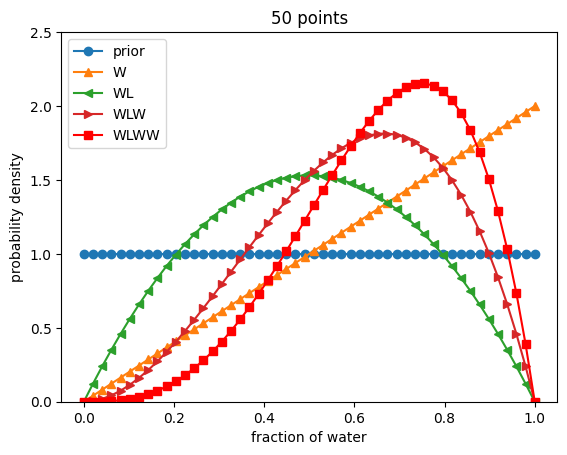

In [ ]:
# fourth tossing: W
prior = posterior.copy()  # the posterior from the previous step is now the prior

for i in range(size):
    θ = θ_grid[i]
    likelihood[i] = θ  # likelihood is for W (probability to get W)
    posterior_unstandardized[i] = likelihood[i] * prior[i]

posterior = posterior_unstandardized / (np.sum(posterior_unstandardized) * 1.0/size)

ax.plot(θ_grid, posterior, 's-', color='red', label="WLWW")
ax.legend()
display(fig)

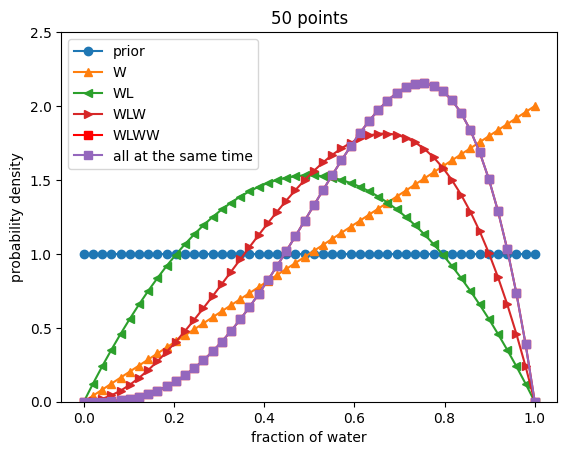

In [ ]:
# Bayesian update using all the data at the same time
# WLWW

# back to uniform prior (alpha = 1, beta = 1)
for i in range(size):
    prior[i] = beta_dist.pdf(θ_grid[i], 1, 1)

for i in range(size):
    θ = θ_grid[i]
    likelihood[i] = θ * (1-θ) * θ * θ  # likelihood is for WLWW (independent, so we multiply the individual likelihoods)
    posterior_unstandardized[i] = likelihood[i] * prior[i]

posterior = posterior_unstandardized / (np.sum(posterior_unstandardized) * 1.0/size)

ax.plot(θ_grid, posterior, 's-', label="all at the same time")
ax.legend()
display(fig)

We can check each of the steps using the analytic solution

Text(0.5, 1.0, '50 points')

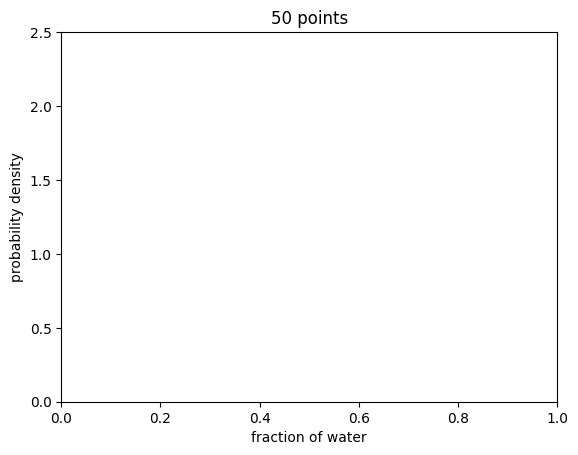

In [ ]:
fig, ax = plt.subplots()

plt.ylim(0, 2.5)
plt.xlabel("fraction of water")
plt.ylabel("probability density")
plt.title(f"{size} points")


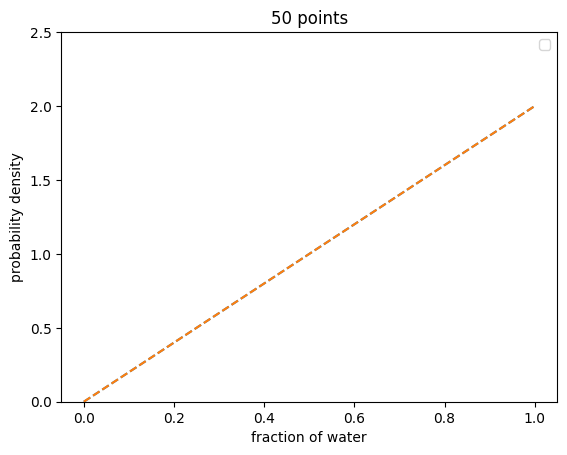

In [ ]:
# first tossing W
analytic = beta_dist(1+1, 1+0)  # (W = 1, L = 0)
ax.plot(θ_grid, analytic.pdf(θ_grid), '--')
display(fig)


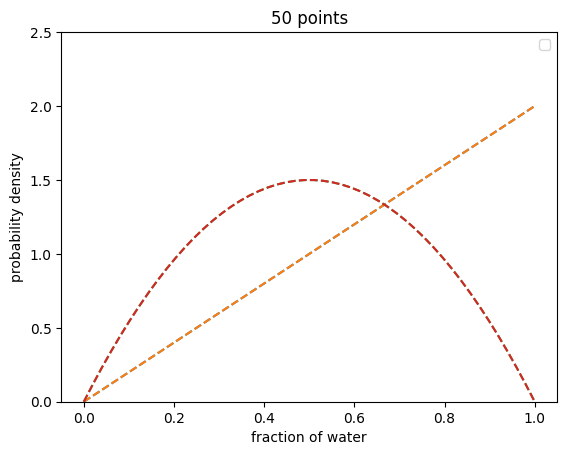

In [ ]:
# second tossing L
analytic = beta_dist(1+1, 1+1)  # (W = 1, L = 1)
ax.plot(θ_grid, analytic.pdf(θ_grid), '--')
display(fig)

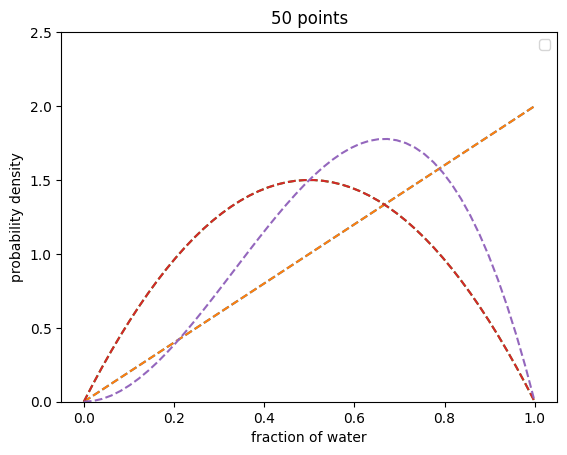

In [ ]:
# third tossing W
analytic = beta_dist(1+2, 1+1)  # (W = 2, L = 1)
ax.plot(θ_grid, analytic.pdf(θ_grid), '--')
display(fig)



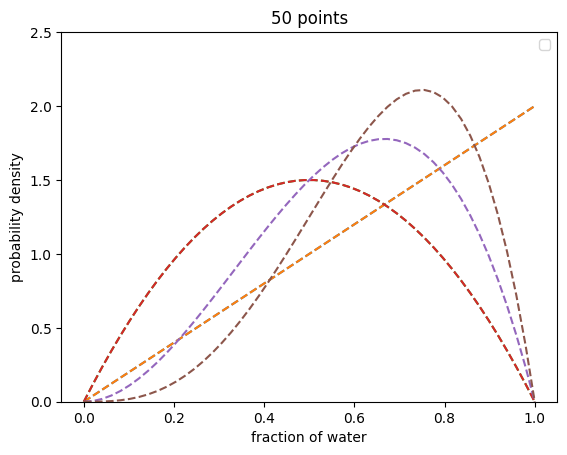

In [ ]:
# fourth tossing W
analytic = beta_dist(1+3, 1+1)  # (W = 3, L = 1)
ax.plot(θ_grid, analytic.pdf(θ_grid), '--')
display(fig)


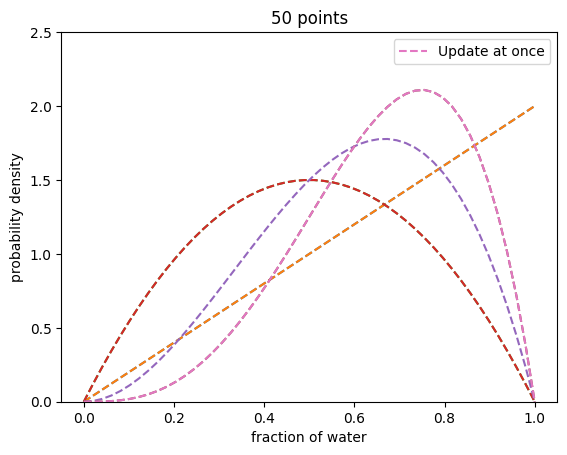

In [ ]:
# Update all at the same time
analytic = beta_dist(1+3, 1+(4-3))
ax.plot(θ_grid, analytic.pdf(θ_grid), '--', label="Update at once")

ax.legend()
display(fig)


In [ ]:
# Using PyMC for MCMC
with pm.Model() as water_land_model:
    # Prior
    θ = pm.Uniform('θ', 0, 1)  # same as Beta(1,1)
    # Likelihood
    x = pm.Binomial('x', n=4, p=θ, observed=3)  # 3 successes out of 4 trials
    # Sample from the posterior
    trace = pm.sample(1000)

# Display summary stats
pm.summary(trace)



Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.673,0.178,0.345,0.965,0.006,0.003,860.0,852.0,1.0


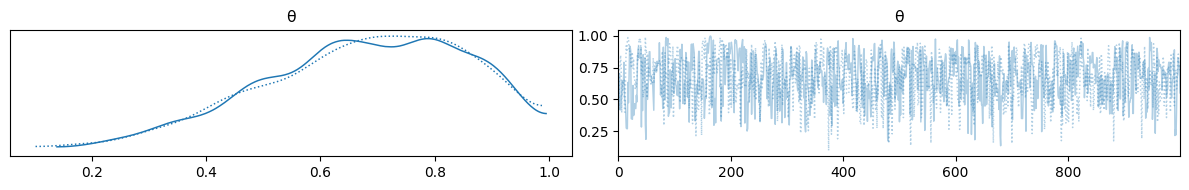

In [ ]:
# Plot trace
az.plot_trace(trace)
plt.tight_layout()
plt.show()